In [1]:
'''
Setting GPUs memory limit for each notebook.
Ref: https://stackoverflow.com/questions/69401285/attempting-to-perform-blas-operation-using-streamexecutor-without-blas-support
'''
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
  except RuntimeError as e:
    print(e)

2023-03-06 14:53:48.489465: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 14:53:49.044449: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/lib64
2023-03-06 14:53:49.044497: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/

# CH2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.2 讀取 .csv

In [3]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info() #data.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
x = np.array(data)[:, :8].astype('float32')
x

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  3.2200e+02,
         1.2600e+02,  8.3252e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  2.4010e+03,
         1.1380e+03,  8.3014e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  4.9600e+02,
         1.7700e+02,  7.2574e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.0070e+03,
         4.3300e+02,  1.7000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  7.4100e+02,
         3.4900e+02,  1.8672e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  1.3870e+03,
         5.3000e+02,  2.3886e+00]], dtype=float32)

In [8]:
y = np.array(data)[:, 8].astype('int')
y

array([452600, 358500, 352100, ...,  92300,  84700,  89400])

## Split Data

In [9]:
from sklearn.model_selection import train_test_split
x_train_set, x_test, y_train_set, y_test =  train_test_split(x, y, random_state = 1)

In [10]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

((15324, 8), (15324,), (5109, 8), (5109,))

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_set, y_train_set, random_state = 1)

### Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [13]:
scalery = StandardScaler()
y_train = scalery.fit_transform(y_train.reshape(-1, 1))
y_valid = scalery.transform(y_valid.reshape(-1, 1))
y_test = scalery.transform(y_test.reshape(-1, 1))

## 1. Build Model

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [15]:
model = Sequential([
    Dense(units=100, activation='relu', input_shape=x_train.shape[1:]),
    # Dense(units=100, activation='relu'),
    Dense(units=50, activation='relu'),
    Dense(units=1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


2023-03-06 14:53:50.950567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 14:53:51.290060: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


## 2. Compile

In [16]:
model.compile(loss='mse', optimizer=SGD(learning_rate=1e-3))

## 3. Train

In [17]:
train = model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_valid, y_valid))

Epoch 1/10
  1/360 [..............................] - ETA: 5:25 - loss: 0.8061

2023-03-06 14:53:52.300965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-06 14:53:52.302698: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x5558f92da3c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-06 14:53:52.302711: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-06 14:53:52.333924: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


360/360 [==============================] - 2s 2ms/step - loss: 0.8570 - val_loss: 0.6530
Epoch 2/10
360/360 [==============================] - 1s 1ms/step - loss: 0.5778 - val_loss: 0.5073
Epoch 3/10
360/360 [==============================] - 1s 1ms/step - loss: 0.4937 - val_loss: 0.4608
Epoch 4/10
360/360 [==============================] - 1s 2ms/step - loss: 0.4618 - val_loss: 0.4369
Epoch 5/10
360/360 [==============================] - 1s 1ms/step - loss: 0.4414 - val_loss: 0.4198
Epoch 6/10
360/360 [==============================] - 1s 1ms/step - loss: 0.4250 - val_loss: 0.4045
Epoch 7/10
360/360 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.3924
Epoch 8/10
360/360 [==============================] - 0s 1ms/step - loss: 0.3984 - val_loss: 0.3813
Epoch 9/10
360/360 [==============================] - 1s 1ms/step - loss: 0.3876 - val_loss: 0.3722
Epoch 10/10
360/360 [==============================] - 1s 1ms/step - loss: 0.3781 - val_loss: 0.3637


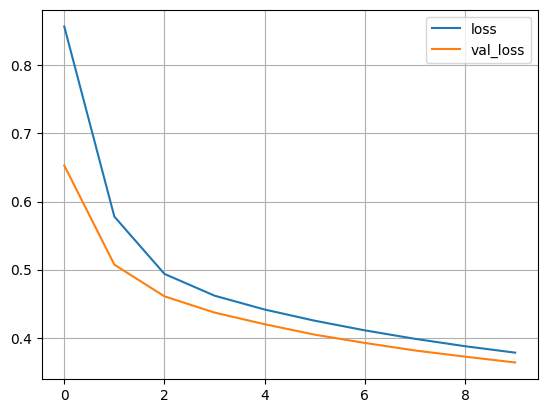

In [18]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

## 4. Evaluate

In [19]:
model.evaluate(x_test, y_test)

160/160 [==============================] - 0s 870us/step - loss: 0.3750


0.37500089406967163